## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  58.945800   522.361895  0.946300  9.705571  1.419658
1  61.611099  1384.124899  0.121968  6.013387  1.296778
2  20.151334  1448.935850  0.909771  2.845131  1.505806
3  58.392604  1151.167094  0.853768  3.104454  1.405894
4  69.255052  1749.798097  0.440568  6.813264  1.468921


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.24844 | train_mse: 8.29467 | train_mae: 2.08316 |  0:00:00s
epoch 1  | loss: 1.23278 | train_mse: 5.67624 | train_mae: 1.75229 |  0:00:00s
epoch 2  | loss: 1.15594 | train_mse: 4.07112 | train_mae: 1.4628  |  0:00:00s


epoch 3  | loss: 1.04861 | train_mse: 3.18524 | train_mae: 1.32992 |  0:00:00s
epoch 4  | loss: 0.82689 | train_mse: 2.67262 | train_mae: 1.25703 |  0:00:00s


epoch 5  | loss: 0.92644 | train_mse: 2.19582 | train_mae: 1.16863 |  0:00:00s
epoch 6  | loss: 0.96863 | train_mse: 1.86022 | train_mae: 1.07756 |  0:00:00s
epoch 7  | loss: 0.86859 | train_mse: 1.60539 | train_mae: 1.00708 |  0:00:00s


epoch 8  | loss: 0.74735 | train_mse: 1.41998 | train_mae: 0.94457 |  0:00:01s
epoch 9  | loss: 0.75363 | train_mse: 1.28905 | train_mae: 0.89633 |  0:00:01s


epoch 10 | loss: 0.88159 | train_mse: 1.25761 | train_mae: 0.87373 |  0:00:01s
epoch 11 | loss: 0.67988 | train_mse: 1.27353 | train_mae: 0.84802 |  0:00:01s


epoch 12 | loss: 0.74301 | train_mse: 1.22135 | train_mae: 0.81637 |  0:00:01s
epoch 13 | loss: 0.6973  | train_mse: 1.12158 | train_mae: 0.78301 |  0:00:01s


epoch 14 | loss: 0.65143 | train_mse: 1.04417 | train_mae: 0.75505 |  0:00:01s
epoch 15 | loss: 0.65176 | train_mse: 0.98747 | train_mae: 0.73067 |  0:00:02s


epoch 16 | loss: 0.64966 | train_mse: 0.9447  | train_mae: 0.71111 |  0:00:02s
epoch 17 | loss: 0.47715 | train_mse: 0.90357 | train_mae: 0.69687 |  0:00:02s


epoch 18 | loss: 0.52733 | train_mse: 0.85807 | train_mae: 0.68143 |  0:00:02s
epoch 19 | loss: 0.56433 | train_mse: 0.80222 | train_mae: 0.65812 |  0:00:02s


epoch 20 | loss: 0.63442 | train_mse: 0.761   | train_mae: 0.64083 |  0:00:02s
epoch 21 | loss: 0.42883 | train_mse: 0.73587 | train_mae: 0.62984 |  0:00:02s


epoch 22 | loss: 0.62605 | train_mse: 0.71095 | train_mae: 0.61329 |  0:00:02s
epoch 23 | loss: 0.62677 | train_mse: 0.71942 | train_mae: 0.60213 |  0:00:03s


epoch 24 | loss: 0.75044 | train_mse: 0.71299 | train_mae: 0.59167 |  0:00:03s
epoch 25 | loss: 0.44057 | train_mse: 0.57073 | train_mae: 0.56392 |  0:00:03s


epoch 26 | loss: 0.49561 | train_mse: 0.54062 | train_mae: 0.55389 |  0:00:03s
epoch 27 | loss: 0.51118 | train_mse: 0.52318 | train_mae: 0.54535 |  0:00:03s


epoch 28 | loss: 0.47476 | train_mse: 0.51123 | train_mae: 0.53861 |  0:00:03s
epoch 29 | loss: 0.46663 | train_mse: 0.4973  | train_mae: 0.53315 |  0:00:03s


epoch 30 | loss: 0.40887 | train_mse: 0.48406 | train_mae: 0.52879 |  0:00:03s
epoch 31 | loss: 0.53336 | train_mse: 0.48381 | train_mae: 0.5237  |  0:00:04s


epoch 32 | loss: 0.51234 | train_mse: 0.50309 | train_mae: 0.5197  |  0:00:04s
epoch 33 | loss: 0.62478 | train_mse: 0.50035 | train_mae: 0.51845 |  0:00:04s


epoch 34 | loss: 0.58183 | train_mse: 0.45161 | train_mae: 0.50981 |  0:00:04s
epoch 35 | loss: 0.47734 | train_mse: 0.43681 | train_mae: 0.50554 |  0:00:04s


epoch 36 | loss: 0.4682  | train_mse: 0.42808 | train_mae: 0.49855 |  0:00:04s


epoch 37 | loss: 0.50501 | train_mse: 0.44126 | train_mae: 0.50116 |  0:00:05s
epoch 38 | loss: 0.62986 | train_mse: 0.4685  | train_mae: 0.50374 |  0:00:05s


epoch 39 | loss: 0.40786 | train_mse: 0.48981 | train_mae: 0.50559 |  0:00:05s
epoch 40 | loss: 0.46167 | train_mse: 0.48145 | train_mae: 0.50307 |  0:00:05s
epoch 41 | loss: 0.37801 | train_mse: 0.47237 | train_mae: 0.50065 |  0:00:05s


epoch 42 | loss: 0.40607 | train_mse: 0.45951 | train_mae: 0.49241 |  0:00:05s
epoch 43 | loss: 0.43718 | train_mse: 0.45198 | train_mae: 0.48678 |  0:00:05s


epoch 44 | loss: 0.36901 | train_mse: 0.43472 | train_mae: 0.47578 |  0:00:05s
epoch 45 | loss: 0.34089 | train_mse: 0.43207 | train_mae: 0.47041 |  0:00:05s
epoch 46 | loss: 0.47305 | train_mse: 0.42875 | train_mae: 0.46233 |  0:00:05s


epoch 47 | loss: 0.37566 | train_mse: 0.42292 | train_mae: 0.45853 |  0:00:06s
epoch 48 | loss: 0.46824 | train_mse: 0.40838 | train_mae: 0.45235 |  0:00:06s
epoch 49 | loss: 0.39249 | train_mse: 0.39203 | train_mae: 0.44335 |  0:00:06s


epoch 50 | loss: 0.39406 | train_mse: 0.38637 | train_mae: 0.43858 |  0:00:06s
epoch 51 | loss: 0.32347 | train_mse: 0.3796  | train_mae: 0.4352  |  0:00:06s
epoch 52 | loss: 0.54511 | train_mse: 0.37474 | train_mae: 0.43321 |  0:00:06s


epoch 53 | loss: 0.44922 | train_mse: 0.36407 | train_mae: 0.4342  |  0:00:06s
epoch 54 | loss: 0.38788 | train_mse: 0.35344 | train_mae: 0.43092 |  0:00:06s


epoch 55 | loss: 0.3166  | train_mse: 0.32871 | train_mae: 0.42449 |  0:00:06s
epoch 56 | loss: 0.38836 | train_mse: 0.2757  | train_mae: 0.40274 |  0:00:06s
epoch 57 | loss: 0.37845 | train_mse: 0.2746  | train_mae: 0.40194 |  0:00:06s


epoch 58 | loss: 0.52576 | train_mse: 0.25603 | train_mae: 0.39087 |  0:00:07s
epoch 59 | loss: 0.35895 | train_mse: 0.24825 | train_mae: 0.3836  |  0:00:07s
epoch 60 | loss: 0.32314 | train_mse: 0.24563 | train_mae: 0.37999 |  0:00:07s


epoch 61 | loss: 0.28627 | train_mse: 0.24726 | train_mae: 0.37736 |  0:00:07s
epoch 62 | loss: 0.44082 | train_mse: 0.24917 | train_mae: 0.37673 |  0:00:07s
epoch 63 | loss: 0.44807 | train_mse: 0.25226 | train_mae: 0.377   |  0:00:07s


epoch 64 | loss: 0.38475 | train_mse: 0.2506  | train_mae: 0.37546 |  0:00:07s
epoch 65 | loss: 0.37455 | train_mse: 0.24677 | train_mae: 0.37149 |  0:00:07s


epoch 66 | loss: 0.37723 | train_mse: 0.24369 | train_mae: 0.36806 |  0:00:07s
epoch 67 | loss: 0.32557 | train_mse: 0.23821 | train_mae: 0.36473 |  0:00:07s
epoch 68 | loss: 0.33032 | train_mse: 0.23891 | train_mae: 0.36388 |  0:00:07s


epoch 69 | loss: 0.33756 | train_mse: 0.23797 | train_mae: 0.36564 |  0:00:08s
epoch 70 | loss: 0.42082 | train_mse: 0.24063 | train_mae: 0.36908 |  0:00:08s
epoch 71 | loss: 0.27996 | train_mse: 0.24213 | train_mae: 0.37035 |  0:00:08s


epoch 72 | loss: 0.39668 | train_mse: 0.23718 | train_mae: 0.36644 |  0:00:08s
epoch 73 | loss: 0.37501 | train_mse: 0.23368 | train_mae: 0.36379 |  0:00:08s
epoch 74 | loss: 0.37432 | train_mse: 0.2318  | train_mae: 0.36311 |  0:00:08s


epoch 75 | loss: 0.35934 | train_mse: 0.22535 | train_mae: 0.35888 |  0:00:08s
epoch 76 | loss: 0.32347 | train_mse: 0.21769 | train_mae: 0.35452 |  0:00:08s
epoch 77 | loss: 0.3256  | train_mse: 0.21303 | train_mae: 0.34986 |  0:00:08s


epoch 78 | loss: 0.299   | train_mse: 0.20897 | train_mae: 0.34441 |  0:00:08s
epoch 79 | loss: 0.37348 | train_mse: 0.20557 | train_mae: 0.33938 |  0:00:08s


epoch 80 | loss: 0.30812 | train_mse: 0.2034  | train_mae: 0.33682 |  0:00:09s
epoch 81 | loss: 0.41667 | train_mse: 0.20013 | train_mae: 0.33357 |  0:00:09s
epoch 82 | loss: 0.32094 | train_mse: 0.19722 | train_mae: 0.33105 |  0:00:09s


epoch 83 | loss: 0.33379 | train_mse: 0.19494 | train_mae: 0.33042 |  0:00:09s
epoch 84 | loss: 0.24002 | train_mse: 0.19345 | train_mae: 0.32995 |  0:00:09s
epoch 85 | loss: 0.38519 | train_mse: 0.19279 | train_mae: 0.3311  |  0:00:09s


epoch 86 | loss: 0.37795 | train_mse: 0.19296 | train_mae: 0.3345  |  0:00:09s
epoch 87 | loss: 0.39186 | train_mse: 0.1954  | train_mae: 0.33652 |  0:00:09s
epoch 88 | loss: 0.41709 | train_mse: 0.19779 | train_mae: 0.33795 |  0:00:09s


epoch 89 | loss: 0.30127 | train_mse: 0.19625 | train_mae: 0.33661 |  0:00:09s
epoch 90 | loss: 0.39198 | train_mse: 0.19109 | train_mae: 0.33083 |  0:00:10s
epoch 91 | loss: 0.28761 | train_mse: 0.18983 | train_mae: 0.32929 |  0:00:10s


epoch 92 | loss: 0.34555 | train_mse: 0.18838 | train_mae: 0.33058 |  0:00:10s
epoch 93 | loss: 0.3642  | train_mse: 0.1894  | train_mae: 0.33151 |  0:00:10s
epoch 94 | loss: 0.25546 | train_mse: 0.20103 | train_mae: 0.33977 |  0:00:10s


epoch 95 | loss: 0.26107 | train_mse: 0.21065 | train_mae: 0.34177 |  0:00:10s
epoch 96 | loss: 0.29003 | train_mse: 0.19409 | train_mae: 0.33099 |  0:00:10s
epoch 97 | loss: 0.27524 | train_mse: 0.18561 | train_mae: 0.32143 |  0:00:10s


epoch 98 | loss: 0.23006 | train_mse: 0.18238 | train_mae: 0.31839 |  0:00:10s
epoch 99 | loss: 0.26797 | train_mse: 0.18016 | train_mae: 0.31789 |  0:00:10s


epoch 100| loss: 0.34305 | train_mse: 0.18071 | train_mae: 0.31803 |  0:00:11s
epoch 101| loss: 0.28134 | train_mse: 0.18034 | train_mae: 0.31743 |  0:00:11s
epoch 102| loss: 0.21073 | train_mse: 0.18054 | train_mae: 0.31813 |  0:00:11s


epoch 103| loss: 0.26412 | train_mse: 0.17758 | train_mae: 0.31734 |  0:00:11s
epoch 104| loss: 0.25129 | train_mse: 0.17274 | train_mae: 0.31543 |  0:00:11s
epoch 105| loss: 0.5036  | train_mse: 0.1731  | train_mae: 0.315   |  0:00:11s


epoch 106| loss: 0.46247 | train_mse: 0.17701 | train_mae: 0.31787 |  0:00:11s
epoch 107| loss: 0.19065 | train_mse: 0.1733  | train_mae: 0.31312 |  0:00:11s
epoch 108| loss: 0.27156 | train_mse: 0.17166 | train_mae: 0.31327 |  0:00:11s


epoch 109| loss: 0.26878 | train_mse: 0.1696  | train_mae: 0.31285 |  0:00:11s
epoch 110| loss: 0.28534 | train_mse: 0.16743 | train_mae: 0.30955 |  0:00:11s
epoch 111| loss: 0.30946 | train_mse: 0.16392 | train_mae: 0.3052  |  0:00:12s


epoch 112| loss: 0.24666 | train_mse: 0.16479 | train_mae: 0.30476 |  0:00:12s
epoch 113| loss: 0.24012 | train_mse: 0.16525 | train_mae: 0.30437 |  0:00:12s
epoch 114| loss: 0.27237 | train_mse: 0.16381 | train_mae: 0.29993 |  0:00:12s


epoch 115| loss: 0.22817 | train_mse: 0.15875 | train_mae: 0.29254 |  0:00:12s
epoch 116| loss: 0.30851 | train_mse: 0.15801 | train_mae: 0.29245 |  0:00:12s
epoch 117| loss: 0.25335 | train_mse: 0.15551 | train_mae: 0.29062 |  0:00:12s


epoch 118| loss: 0.27514 | train_mse: 0.15376 | train_mae: 0.28879 |  0:00:12s
epoch 119| loss: 0.20798 | train_mse: 0.15123 | train_mae: 0.28656 |  0:00:12s
epoch 120| loss: 0.4578  | train_mse: 0.14934 | train_mae: 0.28428 |  0:00:12s


epoch 121| loss: 0.19105 | train_mse: 0.14939 | train_mae: 0.28486 |  0:00:12s
epoch 122| loss: 0.21812 | train_mse: 0.14615 | train_mae: 0.28307 |  0:00:13s
epoch 123| loss: 0.33244 | train_mse: 0.14576 | train_mae: 0.28415 |  0:00:13s


epoch 124| loss: 0.29685 | train_mse: 0.14798 | train_mae: 0.28679 |  0:00:13s
epoch 125| loss: 0.21494 | train_mse: 0.15139 | train_mae: 0.29082 |  0:00:13s
epoch 126| loss: 0.51433 | train_mse: 0.15217 | train_mae: 0.29249 |  0:00:13s


epoch 127| loss: 0.22425 | train_mse: 0.15273 | train_mae: 0.2929  |  0:00:13s
epoch 128| loss: 0.35841 | train_mse: 0.15271 | train_mae: 0.29342 |  0:00:13s
epoch 129| loss: 0.22256 | train_mse: 0.15149 | train_mae: 0.29259 |  0:00:13s


epoch 130| loss: 0.31037 | train_mse: 0.14761 | train_mae: 0.28575 |  0:00:13s
epoch 131| loss: 0.1698  | train_mse: 0.14061 | train_mae: 0.27578 |  0:00:13s
epoch 132| loss: 0.16517 | train_mse: 0.13558 | train_mae: 0.26905 |  0:00:13s


epoch 133| loss: 0.16433 | train_mse: 0.13266 | train_mae: 0.2678  |  0:00:13s
epoch 134| loss: 0.24288 | train_mse: 0.12814 | train_mae: 0.26497 |  0:00:14s
epoch 135| loss: 0.32026 | train_mse: 0.12389 | train_mae: 0.26282 |  0:00:14s


epoch 136| loss: 0.2077  | train_mse: 0.1198  | train_mae: 0.25577 |  0:00:14s
epoch 137| loss: 0.29759 | train_mse: 0.11841 | train_mae: 0.25445 |  0:00:14s
epoch 138| loss: 0.15636 | train_mse: 0.11567 | train_mae: 0.2524  |  0:00:14s


epoch 139| loss: 0.21531 | train_mse: 0.11359 | train_mae: 0.25013 |  0:00:14s
epoch 140| loss: 0.2893  | train_mse: 0.1142  | train_mae: 0.24755 |  0:00:14s
epoch 141| loss: 0.33862 | train_mse: 0.11243 | train_mae: 0.24711 |  0:00:14s


epoch 142| loss: 0.16054 | train_mse: 0.11513 | train_mae: 0.25303 |  0:00:14s
epoch 143| loss: 0.21314 | train_mse: 0.11615 | train_mae: 0.25538 |  0:00:14s
epoch 144| loss: 0.17975 | train_mse: 0.11434 | train_mae: 0.25465 |  0:00:14s


epoch 145| loss: 0.25819 | train_mse: 0.11245 | train_mae: 0.25351 |  0:00:15s
epoch 146| loss: 0.18758 | train_mse: 0.11025 | train_mae: 0.24847 |  0:00:15s
epoch 147| loss: 0.29012 | train_mse: 0.10995 | train_mae: 0.24852 |  0:00:15s


epoch 148| loss: 0.17356 | train_mse: 0.11294 | train_mae: 0.2552  |  0:00:15s
epoch 149| loss: 0.25997 | train_mse: 0.1152  | train_mae: 0.26089 |  0:00:15s
epoch 150| loss: 0.2228  | train_mse: 0.12011 | train_mae: 0.26669 |  0:00:15s


epoch 151| loss: 0.23308 | train_mse: 0.12178 | train_mae: 0.26879 |  0:00:15s
epoch 152| loss: 0.19748 | train_mse: 0.12471 | train_mae: 0.27139 |  0:00:15s


epoch 153| loss: 0.30683 | train_mse: 0.12586 | train_mae: 0.27238 |  0:00:15s
epoch 154| loss: 0.21039 | train_mse: 0.12611 | train_mae: 0.27322 |  0:00:15s
epoch 155| loss: 0.22944 | train_mse: 0.12793 | train_mae: 0.27332 |  0:00:15s


epoch 156| loss: 0.20809 | train_mse: 0.13119 | train_mae: 0.28014 |  0:00:15s
epoch 157| loss: 0.16361 | train_mse: 0.13341 | train_mae: 0.28149 |  0:00:16s
epoch 158| loss: 0.14533 | train_mse: 0.12665 | train_mae: 0.27793 |  0:00:16s


epoch 159| loss: 0.15672 | train_mse: 0.12594 | train_mae: 0.27774 |  0:00:16s
epoch 160| loss: 0.14782 | train_mse: 0.12637 | train_mae: 0.27773 |  0:00:16s
epoch 161| loss: 0.3208  | train_mse: 0.12615 | train_mae: 0.2786  |  0:00:16s


epoch 162| loss: 0.13657 | train_mse: 0.12439 | train_mae: 0.27744 |  0:00:16s
epoch 163| loss: 0.28638 | train_mse: 0.12316 | train_mae: 0.27481 |  0:00:16s


epoch 164| loss: 0.17302 | train_mse: 0.12166 | train_mae: 0.27351 |  0:00:16s
epoch 165| loss: 0.2703  | train_mse: 0.11925 | train_mae: 0.27086 |  0:00:16s
epoch 166| loss: 0.16237 | train_mse: 0.11836 | train_mae: 0.26991 |  0:00:16s


epoch 167| loss: 0.19177 | train_mse: 0.11807 | train_mae: 0.26851 |  0:00:16s
epoch 168| loss: 0.23302 | train_mse: 0.11832 | train_mae: 0.26668 |  0:00:17s
epoch 169| loss: 0.19191 | train_mse: 0.11865 | train_mae: 0.26664 |  0:00:17s


epoch 170| loss: 0.23597 | train_mse: 0.11971 | train_mae: 0.26867 |  0:00:17s
epoch 171| loss: 0.1263  | train_mse: 0.11902 | train_mae: 0.26912 |  0:00:17s
epoch 172| loss: 0.24316 | train_mse: 0.12164 | train_mae: 0.2723  |  0:00:17s


epoch 173| loss: 0.17418 | train_mse: 0.1219  | train_mae: 0.27255 |  0:00:17s
epoch 174| loss: 0.23934 | train_mse: 0.12168 | train_mae: 0.2725  |  0:00:17s
epoch 175| loss: 0.23268 | train_mse: 0.11965 | train_mae: 0.27038 |  0:00:17s


epoch 176| loss: 0.29203 | train_mse: 0.11788 | train_mae: 0.26752 |  0:00:17s
epoch 177| loss: 0.26849 | train_mse: 0.1148  | train_mae: 0.26396 |  0:00:17s
epoch 178| loss: 0.20033 | train_mse: 0.11199 | train_mae: 0.2598  |  0:00:17s


epoch 179| loss: 0.29254 | train_mse: 0.11226 | train_mae: 0.2599  |  0:00:17s
epoch 180| loss: 0.21677 | train_mse: 0.11051 | train_mae: 0.25911 |  0:00:18s
epoch 181| loss: 0.25212 | train_mse: 0.10989 | train_mae: 0.25867 |  0:00:18s


epoch 182| loss: 0.17428 | train_mse: 0.11123 | train_mae: 0.26101 |  0:00:18s
epoch 183| loss: 0.28236 | train_mse: 0.11431 | train_mae: 0.26205 |  0:00:18s
epoch 184| loss: 0.2731  | train_mse: 0.11382 | train_mae: 0.25757 |  0:00:18s


epoch 185| loss: 0.42266 | train_mse: 0.11477 | train_mae: 0.2567  |  0:00:18s
epoch 186| loss: 0.21351 | train_mse: 0.11861 | train_mae: 0.25775 |  0:00:18s
epoch 187| loss: 0.20079 | train_mse: 0.11954 | train_mae: 0.25765 |  0:00:18s


epoch 188| loss: 0.18984 | train_mse: 0.12051 | train_mae: 0.26034 |  0:00:18s
epoch 189| loss: 0.15883 | train_mse: 0.12262 | train_mae: 0.26494 |  0:00:18s


epoch 190| loss: 0.20103 | train_mse: 0.11835 | train_mae: 0.26237 |  0:00:19s
epoch 191| loss: 0.19971 | train_mse: 0.11908 | train_mae: 0.26352 |  0:00:19s

Early stopping occurred at epoch 191 with best_epoch = 141 and best_train_mae = 0.24711
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.39263817518115857


ABC Pre-generator MAE 0.39320365024807


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

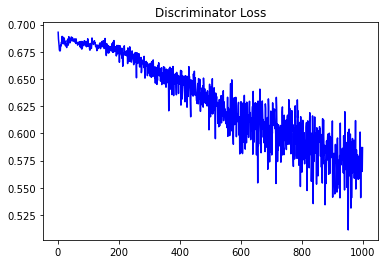

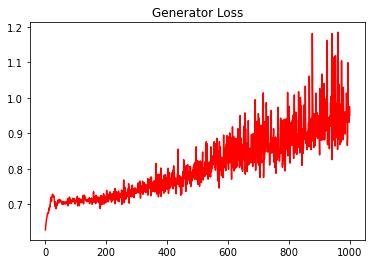

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3625253261178732


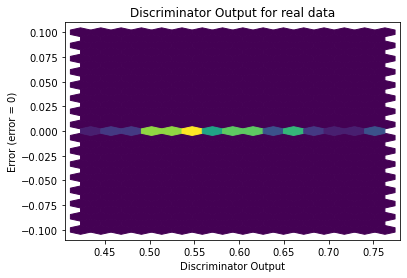

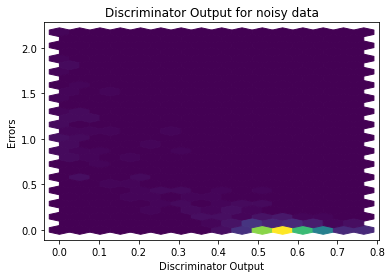

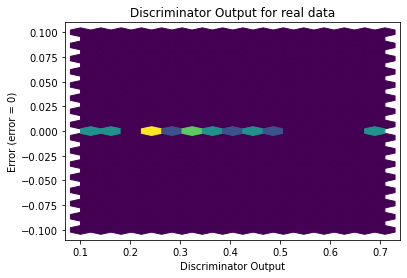

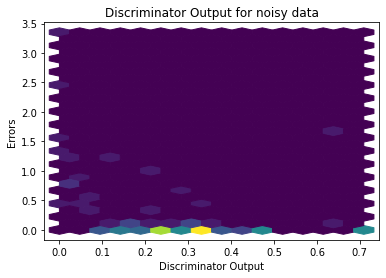

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


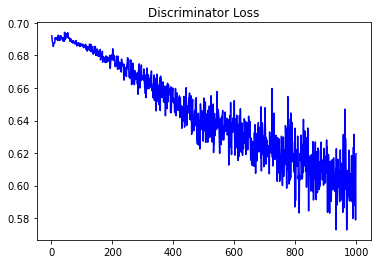

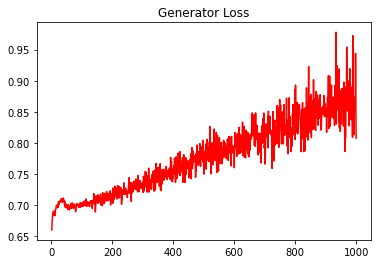

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3935111098010093


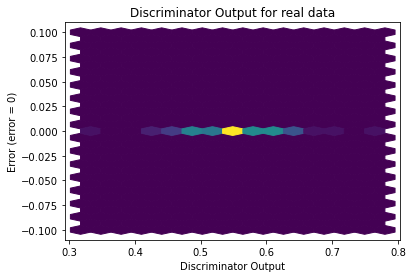

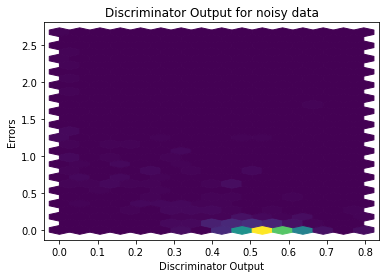

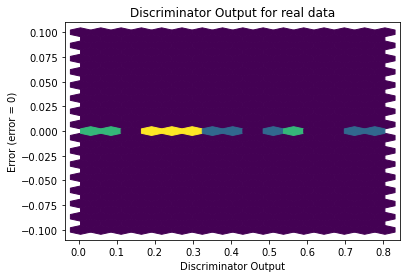

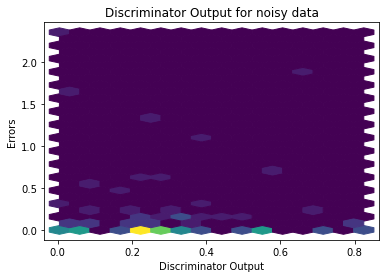

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2799]], requires_grad=True)
